# Q-network for Gridworld problem

Reference:
Simple Reinforcement Learning with Tensorflow: Part 0 - Q-Networks
https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

In [1]:
from __future__ import division

# import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Load the environment

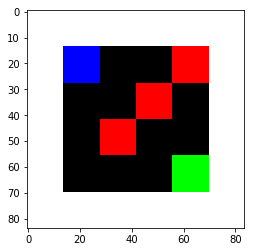

In [2]:
from gridworld import gameEnv

env = gameEnv(partial=False,size=4)

## The Q-Network Approach

### Implementing the network itself

In [3]:
tf.reset_default_graph()

In [4]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

### Training the network

episode: 0 steps: 8 total reward: -1.08 done: True
episode: 100 steps: 6 total reward: 0.94 done: True
episode: 200 steps: 6 total reward: 0.94 done: True
episode: 300 steps: 8 total reward: 0.9199999999999999 done: True
episode: 400 steps: 6 total reward: 0.94 done: True
episode: 500 steps: 7 total reward: 0.9299999999999999 done: True
episode: 600 steps: 6 total reward: 0.94 done: True
episode: 700 steps: 9 total reward: 0.91 done: True
episode: 800 steps: 6 total reward: 0.94 done: True
episode: 900 steps: 6 total reward: 0.94 done: True
episode: 1000 steps: 6 total reward: 0.94 done: True
episode: 1100 steps: 6 total reward: 0.94 done: True
episode: 1200 steps: 5 total reward: -1.05 done: True
episode: 1300 steps: 6 total reward: 0.94 done: True
episode: 1400 steps: 6 total reward: 0.94 done: True
episode: 1500 steps: 8 total reward: 0.9199999999999999 done: True
episode: 1600 steps: 6 total reward: 0.94 done: True
episode: 1700 steps: 6 total reward: 0.94 done: True
episode: 1800 

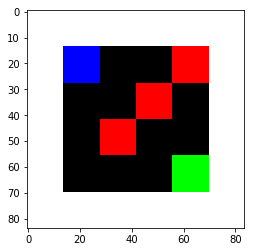

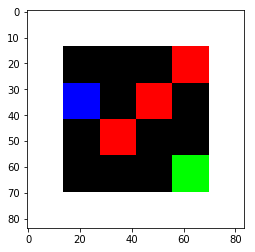

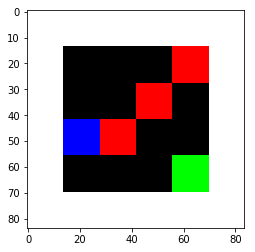

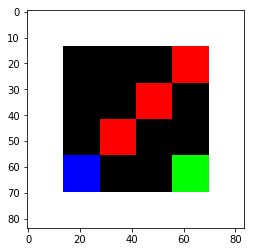

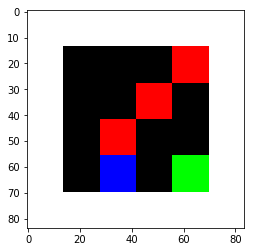

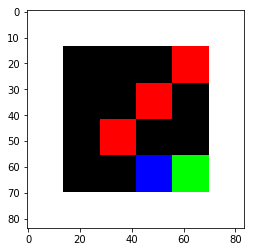

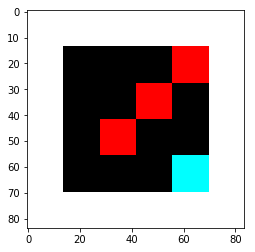

In [5]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99 #gamma
e = 0.1 #epsilon
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
message = "episode: {} steps: {} total reward: {} done: {}"
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        _, s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Pick an action from the Q-network (e-greedy) 
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = np.random.randint(0,3)
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1

            if d == True:
                #Reduce epsilon value as we train the model.
                e = 1./((i/50) + 10)
                break
                
        if i%100 == 0:
            logMessage = message.format(i,j,rAll,d)
            print(logMessage)
        jList.append(j)
        rList.append(rAll)
    
    print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
    
    #Visualization of learned policy
    grid, s = env.reset()
    rAll = 0
    d = False
    j = 0
    plt.figure()
    plt.imshow(grid,interpolation="nearest")
    while j < 99:
        j+=1
        #Pick an action 
        a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
        #Get new state and reward from environment
        s1,r,d, grid = env.step(a[0])
        plt.figure()
        plt.imshow(grid,interpolation="nearest")
        #Obtain the Q' values by feeding the new state through our network
        Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
        #Obtain maxQ' and set our target value for chosen action.
        maxQ1 = np.max(Q1)
        targetQ = allQ
        targetQ[0,a[0]] = r + y*maxQ1
        #Train our network using target and predicted Q values
        _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
        rAll += r
        s = s1
        if d == True:
            #Reduce epsilon value as we train the model.
            e = 1./((i/50) + 10)
            break
    


### Some statistics on network performance

We can see that the network beings to consistly reach the goal around the 750 episode mark.

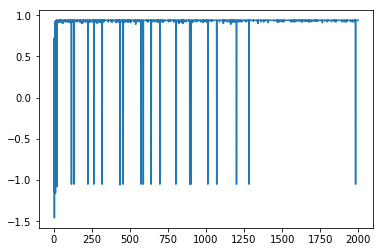

In [6]:
plt.plot(rList)

It also begins to progress through the environment for longer than chance aroudn the 750 mark as well.

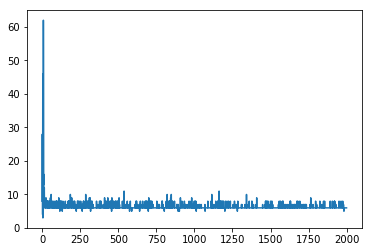

In [7]:
plt.plot(jList)